# Quick overview of the code
Altough this is a jupyter notebook, it is filled with R code.

Before getting started, the following packages are needed.

In [ ]:
install.packages("tidyverse")
install.packages("psych")
install.packages("lavaan")
install.packages("semTools")
install.packages("ggplot2")
install.packages("ltm")

library(tidyverse)
library(psych)
library(lavaan)
library(semTools)
library(ggplot2)
library(ltm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbivnorm’, ‘numDeriv’, ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", in

## Loading the necessary data

In [ ]:
# Getting the data in a tibble
d <- read.csv("data_complete_2023-03-23.csv", header=TRUE, na.strings="NA") %>%
  as_tibble
# Filtering out people who did not consent
d <- d %>%
  filter(INF_CON_02 == 1)
# Selecting only the people who passed the first and the second attention check
d <- d %>%
  filter(ATT_CHE_01 == 6, ATT_CHE_02 == 3)
# 800 participants are left
nrow(d)
# This is a quick overview of the remaining data.
head(d)

[1] 800

X,StartDate,EndDate,Status,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientLastName,⋯,S1_DIS_ENG_02,S1_DIS_ENG_03,SOC_AGE_01,SOC_GEN_01,SOC_INC_01,SOC_INC_02,SOC_INC_02_3_TEXT,SOC_EDU_01,SOC_NAT_01,SOC_NAT_01_3_TEXT
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<lgl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<chr>,<int>,<int>,<chr>
14,2023-03-10 12:39:54,2023-03-10 12:43:24,0,100,209,1,2023-03-10 12:43:25,R_308f7Xhjbmoze9D,NA,⋯,3,5,20,1,15000,2,NA,3,2,NA
15,2023-03-10 12:39:04,2023-03-10 12:43:34,0,100,270,1,2023-03-10 12:43:34,R_zTOsz0nZsoBXfdD,NA,⋯,4,4,21,2,3000,2,NA,3,2,NA
17,2023-03-10 12:40:47,2023-03-10 12:44:51,0,100,243,1,2023-03-10 12:44:51,R_PSwt64yMbHh6XGF,NA,⋯,4,4,24,1,0,2,NA,2,2,NA
19,2023-03-10 12:40:51,2023-03-10 12:46:19,0,100,327,1,2023-03-10 12:46:20,R_3egaNAM3S1ZFelH,NA,⋯,5,5,36,2,100000,2,NA,4,2,NA
20,2023-03-10 12:40:17,2023-03-10 12:46:37,0,100,379,1,2023-03-10 12:46:38,R_10AT9PEvu5JdFBj,NA,⋯,3,3,38,2,1000,2,NA,4,2,NA
22,2023-03-10 12:40:50,2023-03-10 12:47:25,0,100,394,1,2023-03-10 12:47:25,R_AgnCenX4DjKKc25,NA,⋯,3,3,16,1,500,2,NA,3,3,NA


### Selecting the data of our part of the survey

In [ ]:
# Selecting what we need
first_part_df <- select(d,'UserLanguage':'ATT_CHE_01') #The first part, containing our part of the study
second_part_df <- select(d, 'SOC_AGE_01': 'SOC_NAT_01_3_TEXT') #The last part, containing the demographics
# Combining both parts according to the columns
df <- cbind(first_part_df, second_part_df)

## Basic data exploration

The data includes all the variables presented in the measures document, found in the pre-registration. An overview of all the variables are provided. The names match the naming in our measures document.

The average age is 52.6 years (based on 800 participants) with a standard deviation of 17.8.

35.6% are male, 61.0% are female, 0.3% were non-binary, 0.01% prefered not to say.

In [ ]:
# Checking the names of all the variables
names(df)
# Checking the age
describe(df$SOC_AGE_01)
# Checking the gender: 1 is male, 2 is female, 3 is other, 4 is prefer not to say
table(df$SOC_GEN_01) %>%
  prop.table

[1] "UserLanguage"      "INF_CON_02"        "S3_INT_EXP_01"    
 [4] "S3_INT_EXP_02"     "S3_LIT_SUR_01"     "S3_LIT_SUR_02"    
 [7] "S3_LIT_SUR_03"     "S3_LIT_SUR_04"     "S3_LIT_SUR_05"    
[10] "S3_LIT_SUR_06"     "S3_LIT_SUR_07"     "S3_LIT_SUR_08"    
[13] "S3_LIT_TEC_01"     "S3_LIT_TEC_02"     "S3_LIT_TEC_03"    
[16] "S3_LIT_TEC_04"     "S3_LIT_TEC_05"     "S3_LIT_TEC_06"    
[19] "S3_LIT_TEC_07"     "S3_LIT_TEC_08"     "S3_LIT_TEC_09"    
[22] "S3_BEV_SOC_01"     "S3_BEV_SOC_02"     "S3_BEV_SOC_03"    
[25] "S3_BEV_SOC_04"     "S3_BEV_SOC_05"     "S3_BEV_SOC_06"    
[28] "S3_BEV_SOC_07"     "S3_BEV_SOC_08"     "S3_LIT_POL_01"    
[31] "S3_LIT_POL_02"     "S3_LIT_POL_03"     "S3_LIT_POL_04"    
[34] "S3_LIT_POL_05"     "S3_LIT_POL_06"     "S3_LIT_POL_07"    
[37] "S3_BEH_TEC_1"      "S3_BEH_TEC_2"      "S3_BEH_TEC_3"     
[40] "S3_BEH_TEC_4"      "ATT_CHE_01"        "SOC_AGE_01"       
[43] "SOC_GEN_01"        "SOC_INC_01"        "SOC_INC_02"       
[46] "SOC_INC_02_3_TEXT" "SOC_EDU_01"        "SOC_NAT_01"       
[49] "SOC_NAT_01_3_TEXT"

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X1,1,790,52.61084,17.82926,54,53.13449,22.239,0.56,87,86.44,-0.209839,-1.046292,0.6343366



          1           2           3           4 
0.385964912 0.610275689 0.002506266 0.001253133 

# Testing Hypotheses

Before the hypothesis can be tested, the data is transformed: The following sums are according to the original paper, the transforming of the remaining data is based on the results of the replicated survey and the right and wrong statements are transformed according to the pre-registration.

In [ ]:
# Sum Digital Privacy Literacy - Technical familiarity
df <- df %>%
  mutate(LIT_TEC_SUM = (S3_LIT_TEC_01 + S3_LIT_TEC_02 + S3_LIT_TEC_03 + S3_LIT_TEC_04 + S3_LIT_TEC_05 + S3_LIT_TEC_06 + S3_LIT_TEC_07 + S3_LIT_TEC_08 + S3_LIT_TEC_09))

# Sum of Information Control Skill - Tech Dimension
df <- df %>%
  mutate(BEH_TEC_SUM = (S3_BEH_TEC_1 + S3_BEH_TEC_2 + S3_BEH_TEC_3 + S3_BEH_TEC_4))

# Sum of Information Control Skill - Social Dimension
df <- df %>%
  mutate(BEH_SOC_SUM = (S3_BEV_SOC_01 + S3_BEV_SOC_02 + S3_BEV_SOC_03 +  S3_BEV_SOC_04 + S3_BEV_SOC_05 + S3_BEV_SOC_06 + S3_BEV_SOC_07 + S3_BEV_SOC_08))


Transforming:
- **Daily usage of the Internet in minutes**: If it is more than 1440 (24x60) than it is a No Answer.
- **Years of experience with the Internet**: Internet was invented in 1969. If the answer is above this, but below 2023 (current year), we calculated the difference between the answer and 2023. If the answer is lower than 54 (2023-1969) than the answer isn't manipulated. All the remaining answers, we transformed to No Answer.
- **Gender**: The original study compared male (0) to female (1), therefore the numbers were of male and female recoded to be 0 and 1. The remaining responses were coded as No Answer.

In [ ]:
# Filtering out the minutes of use a day that are impossible
df <- df %>%
  mutate(INT_EXP_01_FIN = ifelse(S3_INT_EXP_01 > 1440, NA, S3_INT_EXP_01))

# Filtering out the years of use that are impossible
df <- df %>%
  mutate(INT_EXP_02_FIN = ifelse(S3_INT_EXP_02 > 1969, ifelse(S3_INT_EXP_02 < 2023, (2023 - S3_INT_EXP_02), NA), ifelse(S3_INT_EXP_02 > (2023-1969), NA, S3_INT_EXP_02)))

# Gender: The orginal study only compared male(0) to female(1)
df <- df %>%
  mutate(SOC_GEN_FIN = ifelse(SOC_GEN_01 == 1, 0, ifelse(SOC_GEN_01 == 2, 1, NA)))


**Coding the True and False statement variables**

1 = True

2 = False

3 = I don't know

The answer of "I don't know" is wrong.
When someone has given a wrong answer, we code it as zero. If they answered right, they are coded is one.


In [ ]:
# Adding new columns with whether the respondent answered right or wrong
df <- df %>%
  mutate(S3_LIT_SUR_01_FIN = ifelse(S3_LIT_SUR_01 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_02_FIN = ifelse(S3_LIT_SUR_02 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_03_FIN = ifelse(S3_LIT_SUR_03 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_04_FIN = ifelse(S3_LIT_SUR_04 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_05_FIN = ifelse(S3_LIT_SUR_05 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_06_FIN = ifelse(S3_LIT_SUR_06 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_07_FIN = ifelse(S3_LIT_SUR_07 == 1, 1,0)) %>%
  mutate(S3_LIT_SUR_08_FIN = ifelse(S3_LIT_SUR_08 == 2, 1,0)) %>%
  mutate(S3_LIT_POL_01_FIN = ifelse(S3_LIT_POL_01 == 1, 1,0)) %>%
  mutate(S3_LIT_POL_02_FIN = ifelse(S3_LIT_POL_02 == 1, 1,0)) %>%
  mutate(S3_LIT_POL_03_FIN = ifelse(S3_LIT_POL_03 == 1, 1,0)) %>%
  mutate(S3_LIT_POL_04_FIN = ifelse(S3_LIT_POL_04 == 1, 1,0)) %>%
  mutate(S3_LIT_POL_05_FIN = ifelse(S3_LIT_POL_05 == 2, 1,0)) %>%
  mutate(S3_LIT_POL_06_FIN = ifelse(S3_LIT_POL_06 == 1, 1,0)) %>%
  mutate(S3_LIT_POL_07_FIN = ifelse(S3_LIT_POL_07 == 2, 1,0))


Then we code the sum of the literacy of policy and surveillance.

In [ ]:
# Sum Digital Privacy Literacy - Surveillance practices
df <- df %>%
  mutate(LIT_SUR_SUM = (S3_LIT_SUR_01_FIN + S3_LIT_SUR_02_FIN + S3_LIT_SUR_03_FIN + S3_LIT_SUR_04_FIN + S3_LIT_SUR_05_FIN + S3_LIT_SUR_06_FIN + S3_LIT_SUR_07_FIN + S3_LIT_SUR_08_FIN))

# Sum Digital Privacy Literacy - Policy understanding
df <- df %>%
  mutate(LIT_POL_SUM = (S3_LIT_POL_01_FIN + S3_LIT_POL_02_FIN + S3_LIT_POL_03_FIN + S3_LIT_POL_04_FIN + S3_LIT_POL_05_FIN + S3_LIT_POL_06_FIN + S3_LIT_POL_07_FIN))


Extra: Combining dimensions

In [ ]:
# Mean of Knowledge: Digital Privacy Literacy; technical familirarity, surveillance practices and policy understanding
df <- df %>%
  mutate(KNO_MEAN = (LIT_TEC_SUM + LIT_SUR_SUM + LIT_POL_SUM) / 3)

# Mean of Information Control Skill: Both Tech and Social Dimension
df <- df %>%
  mutate(INF_CON_MEAN = (BEH_TEC_SUM + BEH_SOC_SUM) / 2)

Extra: Correlations between variables

In [ ]:
# Correlations of internet use and literacy
cor.test(df$INT_EXP_01_FIN,df$LIT_TEC_SUM)
cor.test(df$INT_EXP_02_FIN,df$LIT_TEC_SUM)
cor.test(df$INT_EXP_01_FIN,df$LIT_SUR_SUM)
cor.test(df$INT_EXP_02_FIN,df$LIT_SUR_SUM)
cor.test(df$INT_EXP_01_FIN,df$LIT_POL_SUM)
cor.test(df$INT_EXP_02_FIN,df$LIT_POL_SUM)

cor.test(df$INT_EXP_02_FIN,df$KNO_MEAN)
cor.test(df$INT_EXP_01_FIN,df$KNO_MEAN)

# correlations of age and literacy
cor.test(df$SOC_AGE_01,df$KNO_MEAN)




	Pearson's product-moment correlation

data:  df$INT_EXP_01_FIN and df$LIT_TEC_SUM
t = 4.5436, df = 772, p-value = 6.417e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0919595 0.2292453
sample estimates:
      cor 
0.1613831 



	Pearson's product-moment correlation

data:  df$INT_EXP_02_FIN and df$LIT_TEC_SUM
t = 7.4621, df = 784, p-value = 2.265e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1910272 0.3216531
sample estimates:
      cor 
0.2575163 



	Pearson's product-moment correlation

data:  df$INT_EXP_01_FIN and df$LIT_SUR_SUM
t = 2.629, df = 777, p-value = 0.008732
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02381362 0.16306648
sample estimates:
       cor 
0.09389928 



	Pearson's product-moment correlation

data:  df$INT_EXP_02_FIN and df$LIT_SUR_SUM
t = 5.7497, df = 789, p-value = 1.278e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1326831 0.2665179
sample estimates:
      cor 
0.2005359 



	Pearson's product-moment correlation

data:  df$INT_EXP_01_FIN and df$LIT_POL_SUM
t = 0.33094, df = 773, p-value = 0.7408
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.05857081  0.08225709
sample estimates:
       cor 
0.01190216 



	Pearson's product-moment correlation

data:  df$INT_EXP_02_FIN and df$LIT_POL_SUM
t = -0.048064, df = 785, p-value = 0.9617
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.07159152  0.06817730
sample estimates:
         cor 
-0.001715488 



	Pearson's product-moment correlation

data:  df$INT_EXP_02_FIN and df$KNO_MEAN
t = 7.6496, df = 772, p-value = 6.007e-14
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1986873 0.3297415
sample estimates:
      cor 
0.2654401 



	Pearson's product-moment correlation

data:  df$INT_EXP_01_FIN and df$KNO_MEAN
t = 4.4552, df = 760, p-value = 9.642e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08952847 0.22797575
sample estimates:
      cor 
0.1595365 



	Pearson's product-moment correlation

data:  df$SOC_AGE_01 and df$KNO_MEAN
t = -3.9461, df = 766, p-value = 8.674e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.20980019 -0.07111677
sample estimates:
       cor 
-0.1411509 


# Testing hypotheses

The following code consists of the hierarchical regressions as well as the interactions per social behavior and technical behavior.

In [ ]:
# Regression on Social Behavior
LM_SOC_1 <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN), data = df)
LM_SOC_2 <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN), data = df)

# Regression on Social Behavior with literacy
LM_SOC_TEC <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_TEC_SUM), data = df)
LM_SOC_SUR <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_SUR_SUM), data = df)
LM_SOC_POL <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_POL_SUM), data = df)

# Interaction regression on Social Behavior with literacy
# Internet experience daily
SOC_INT_TEC_D <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_TEC_SUM) + scale(LIT_TEC_SUM):scale(INT_EXP_01_FIN), data = df)
SOC_INT_SUR_D <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_SUR_SUM) + scale(LIT_SUR_SUM):scale(INT_EXP_01_FIN), data = df)
SOC_INT_POL_D <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_POL_SUM) + scale(LIT_POL_SUM):scale(INT_EXP_01_FIN), data = df)
# Internet experience yearly
SOC_INT_TEC_Y <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_TEC_SUM) + scale(LIT_TEC_SUM):scale(INT_EXP_02_FIN), data = df)
SOC_INT_SUR_Y <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_SUR_SUM) + scale(LIT_SUR_SUM):scale(INT_EXP_02_FIN), data = df)
SOC_INT_POL_Y <- lm(scale(BEH_SOC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_POL_SUM) + scale(LIT_POL_SUM):scale(INT_EXP_02_FIN), data = df)

###################################

# Regression on Technical Behavior
LM_TEC_1 <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN), data = df)
LM_TEC_2 <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN), data = df)

# Regression on Technical Behavior with literacy
LM_TEC_TEC <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_TEC_SUM), data = df)
LM_TEC_SUR <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_SUR_SUM), data = df)
LM_TEC_POL <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_POL_SUM), data = df)

# Interaction regression on Technical Behavior with literacy
# Internet experience daily
TEC_INT_TEC_D <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_TEC_SUM) + scale(LIT_TEC_SUM):scale(INT_EXP_01_FIN), data = df)
TEC_INT_SUR_D <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_SUR_SUM) + scale(LIT_SUR_SUM):scale(INT_EXP_01_FIN), data = df)
TEC_INT_POL_D <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_POL_SUM) + scale(LIT_POL_SUM):scale(INT_EXP_01_FIN), data = df)
# Internet experience yearly
TEC_INT_TEC_Y <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_TEC_SUM) + scale(LIT_TEC_SUM):scale(INT_EXP_02_FIN), data = df)
TEC_INT_SUR_Y <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_SUR_SUM) + scale(LIT_SUR_SUM):scale(INT_EXP_02_FIN), data = df)
TEC_INT_POL_Y <- lm(scale(BEH_TEC_SUM) ~ scale(SOC_AGE_01) + scale(SOC_EDU_01) + scale(SOC_GEN_FIN) + scale(INT_EXP_01_FIN) + scale(INT_EXP_02_FIN) + scale(LIT_POL_SUM) + scale(LIT_POL_SUM):scale(INT_EXP_02_FIN), data = df)


# Comparing the original effect sized to the replicated ones.

To compare the results, a plot is made for social behavior and technical behavior. 

In order to get the results to asses the quality of the replication, we took the standardized effect size of the regressions as well as the confidence intervals. These are then combined in a table and plotted.

## Social Behavior

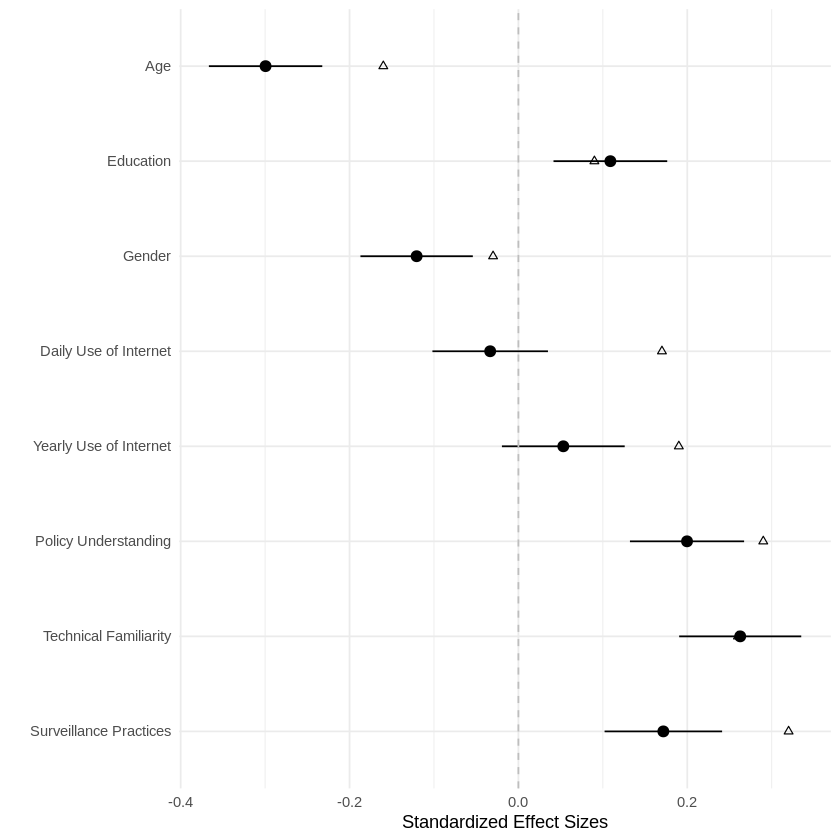

In [ ]:
# Getting the results for the graph
LM_SOC_1_COEF <- bind_cols(summary(LM_SOC_1)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_SOC_1)) %>%
  slice(-1)

LM_SOC_2_COEF <- bind_cols(summary(LM_SOC_2)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_SOC_2)) %>%
  slice(-c(1:4))

LM_SOC_TEC_COEF <- bind_cols(summary(LM_SOC_TEC)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_SOC_TEC)) %>%
  slice(-c(1:6))

LM_SOC_SUR_COEF <- bind_cols(summary(LM_SOC_SUR)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_SOC_SUR)) %>%
  slice(-c(1:6))

LM_SOC_POL_COEF <- bind_cols(summary(LM_SOC_POL)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_SOC_POL)) %>%
  slice(-c(1:6))

# Combining the results
comb1 <- bind_rows(LM_SOC_1_COEF, LM_SOC_2_COEF, LM_SOC_POL_COEF, LM_SOC_TEC_COEF, LM_SOC_SUR_COEF)
names(comb1) <- c("Predictor", "Estimate", "se", "t","p","ci.lower", "ci.upper")

# Creating new column filled with the effect sizes of the original study
comb1 <- comb1 %>%
  mutate(original_effect = c(-0.16,0.09,-0.03,0.17,0.19,0.29,0.26,0.32)) %>%
  mutate(original_significance = c(0.01, 0.5, 0.5, 0.001, 0.001, 0.001, 0.001, 0.001)) #0.5 is assigned when not sig.

# Providing labels
comb1 <- comb1 %>%
  mutate(labels = c("Age", "Education", "Gender", "Daily Use of Internet", "Yearly Use of Internet","Policy Understanding", "Technical Familiarity", "Surveillance Practices" )) %>%
  mutate(order = c(1, 2, 3, 4, 5, 6, 7, 8))
# Preparing the labels to be reordered in the plot
comb1$labels <- as.character(comb1$labels)
comb1$labels <- factor(comb1$labels, levels=rev(comb1$labels))

# Plotting the Graph
comb1 %>%
  mutate(Significance = ifelse(p < .05, TRUE, FALSE)) %>%
  mutate(original_significance = ifelse(p < .05, TRUE, FALSE)) %>%
  ggplot(aes(x = reorder(labels, -order), y = Estimate, ymin = ci.lower, ymax = ci.upper)) +
  coord_flip() +
  geom_pointrange() +
  geom_point(aes(x = labels, y = original_effect), shape = 2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey") +
  theme_minimal() +
  labs(x = "", y = "Standardized Effect Sizes")


## Technical behavior

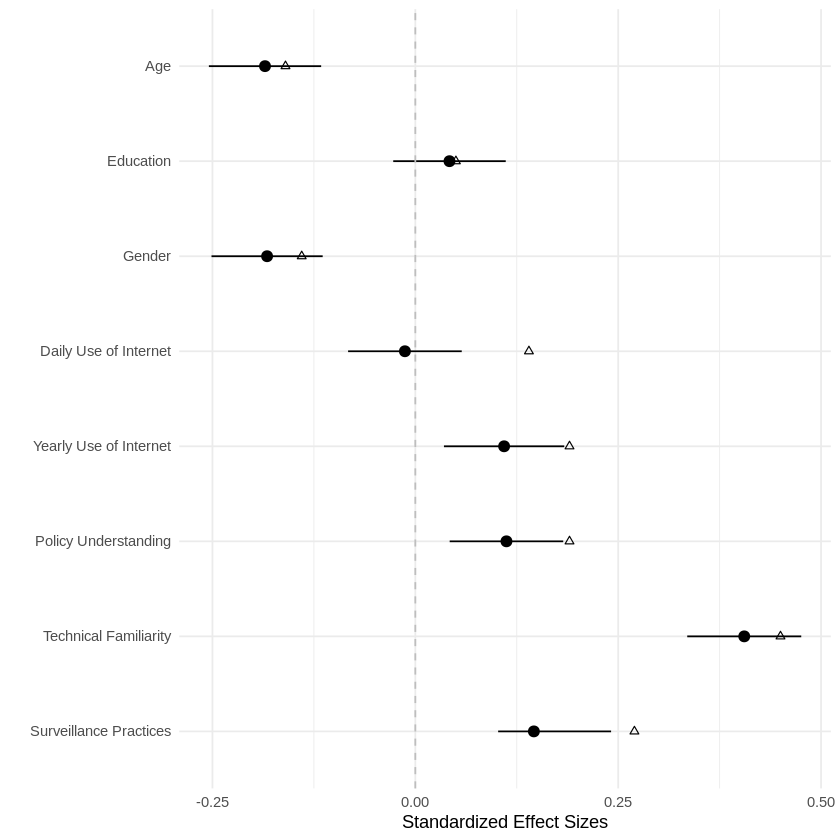

In [ ]:
# Getting the results for the graph
LM_TEC_1_COEF <- bind_cols(summary(LM_TEC_1)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_TEC_1)) %>%
  slice(-1)

LM_TEC_2_COEF <- bind_cols(summary(LM_TEC_2)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_TEC_2)) %>%
  slice(-c(1:4))

LM_TEC_TEC_COEF <- bind_cols(summary(LM_TEC_TEC)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_TEC_TEC)) %>%
  slice(-c(1:6))

LM_TEC_SUR_COEF <- bind_cols(summary(LM_TEC_SUR)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_SOC_SUR)) %>%
  slice(-c(1:6))

LM_TEC_POL_COEF <- bind_cols(summary(LM_TEC_POL)$coef %>%
  as.data.frame %>%
  rownames_to_column, confint(LM_TEC_POL)) %>%
  slice(-c(1:6))

# Combining the results
comb2 <- bind_rows(LM_TEC_1_COEF, LM_TEC_2_COEF, LM_TEC_POL_COEF, LM_TEC_TEC_COEF, LM_TEC_SUR_COEF)
names(comb2) <- c("Predictor", "Estimate", "se", "t","p","ci.lower", "ci.upper")

# Creating new column filled with the effect sizes of the original study
comb2 <- comb2 %>%
  mutate(original_effect2 = c(-0.16,0.05,-0.14,0.14,0.19,0.19,0.45,0.27))

# Providing labels
comb2 <- comb2 %>%
  mutate(labels = c("Age", "Education", "Gender", "Daily Use of Internet", "Yearly Use of Internet","Policy Understanding", "Technical Familiarity", "Surveillance Practices" )) %>%
  mutate(order = c(1, 2, 3, 4, 5, 6, 7, 8))
# Preparing the labels to be reordered in the plot
comb2$labels <- as.character(comb2$labels)
comb2$labels <- factor(comb2$labels, levels=rev(comb2$labels))

# Plotting the Graph
comb2 %>%
  ggplot(aes(x = reorder(labels, -order), y = Estimate, ymin = ci.lower, ymax = ci.upper)) +
  coord_flip() +
  geom_pointrange() +
  geom_point(aes(x = labels, y = original_effect2), shape = 2) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "grey") +
  theme_minimal() +
  labs(x = "", y = "Standardized Effect Sizes")


# Reliability & Validity of Measures
A Confirmatory Factor Analysis (CFA) is performed to check the quality of the models. The Cornbach's alpha is used to test the reliability of the data.

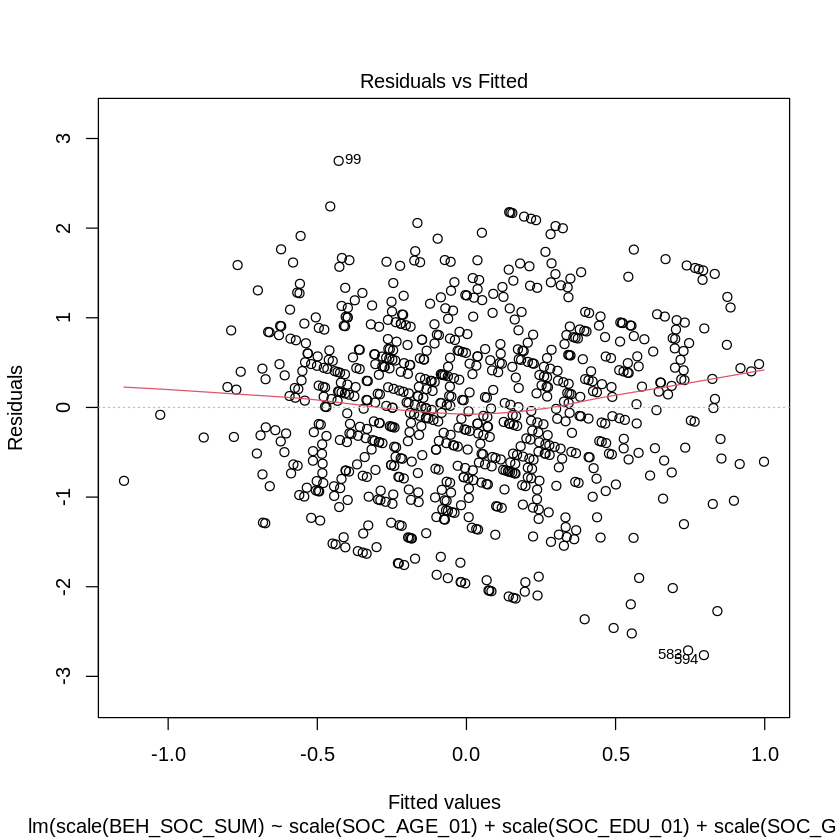

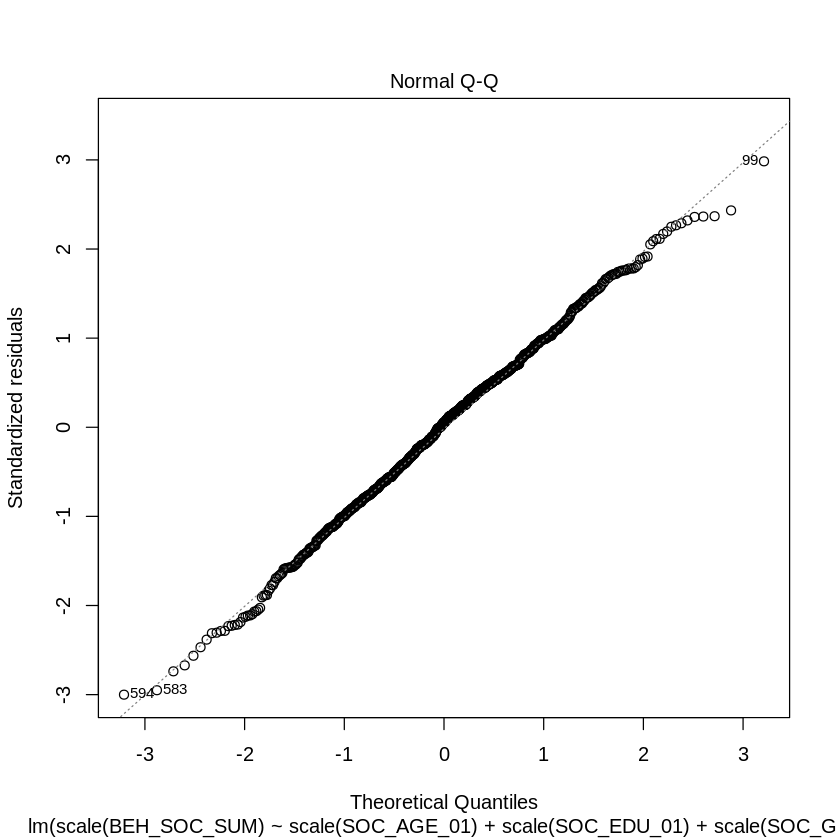

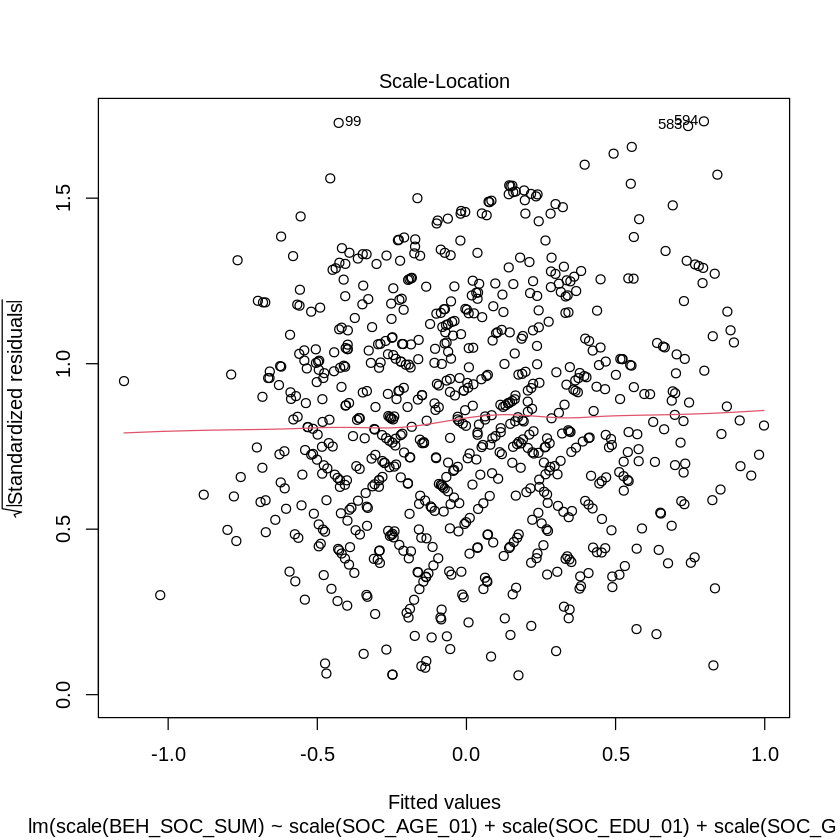

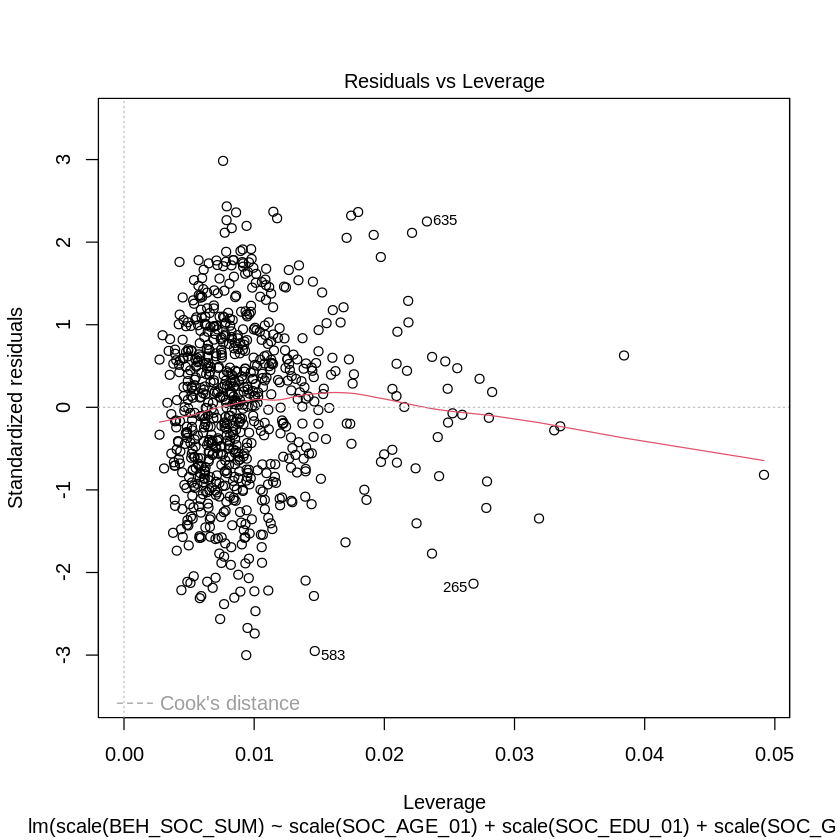

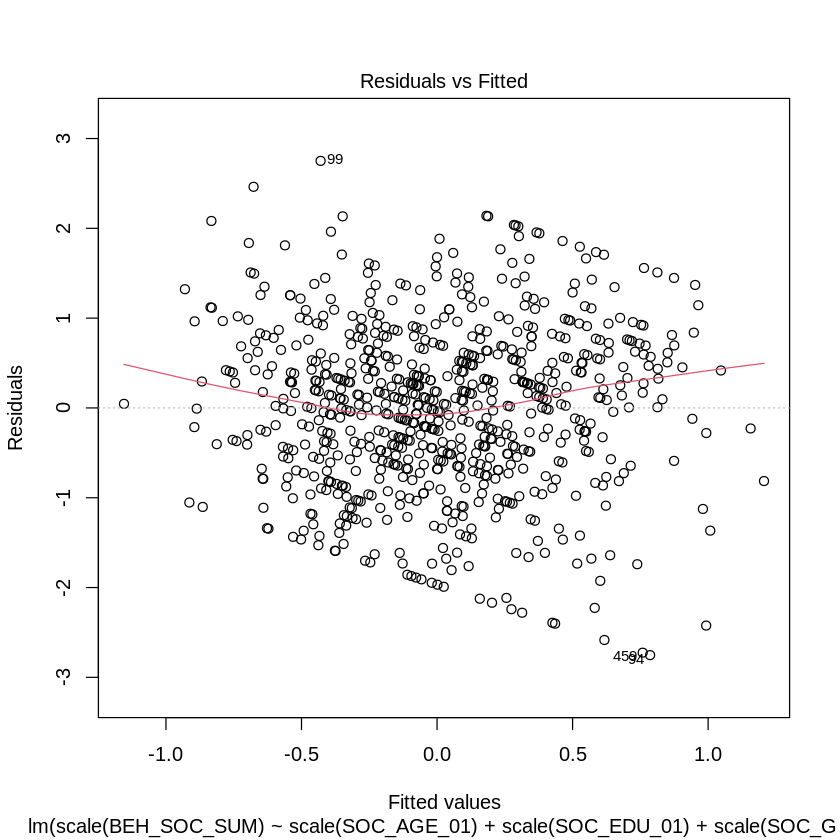

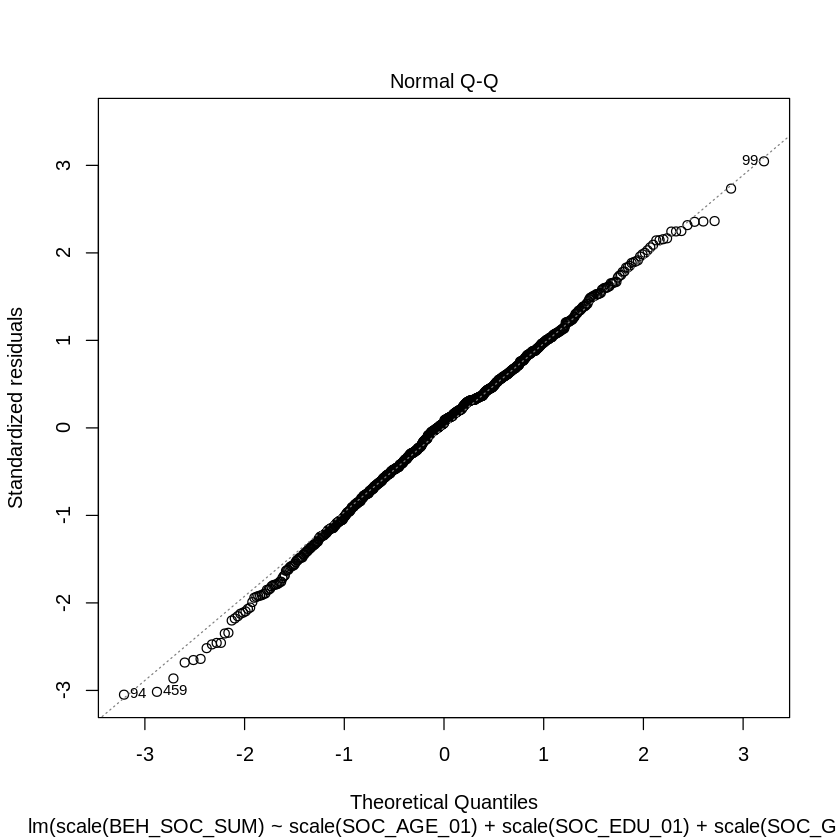

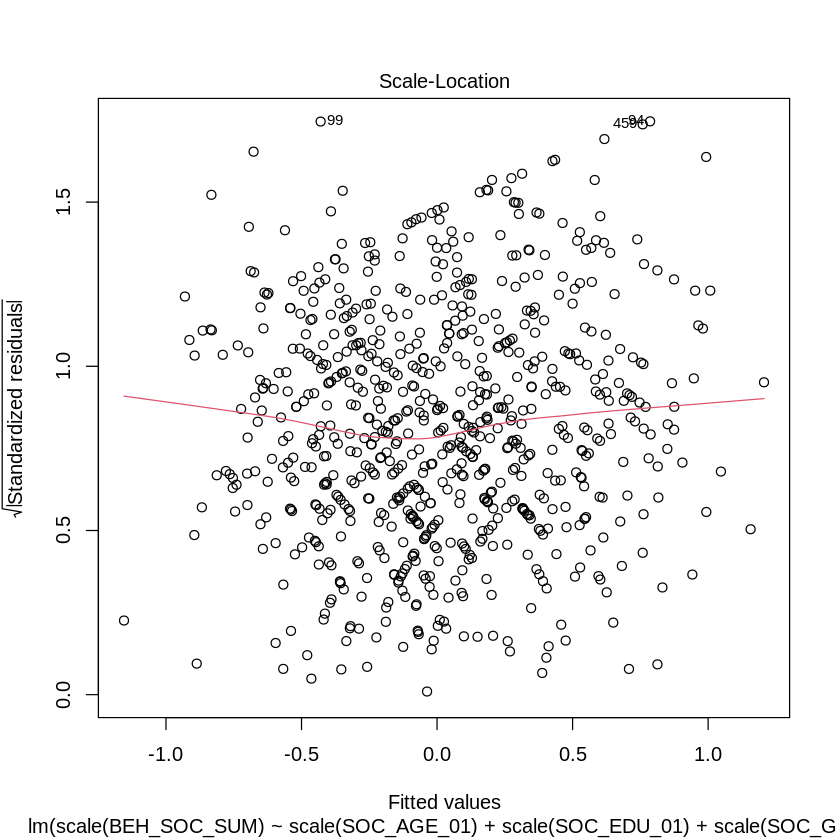

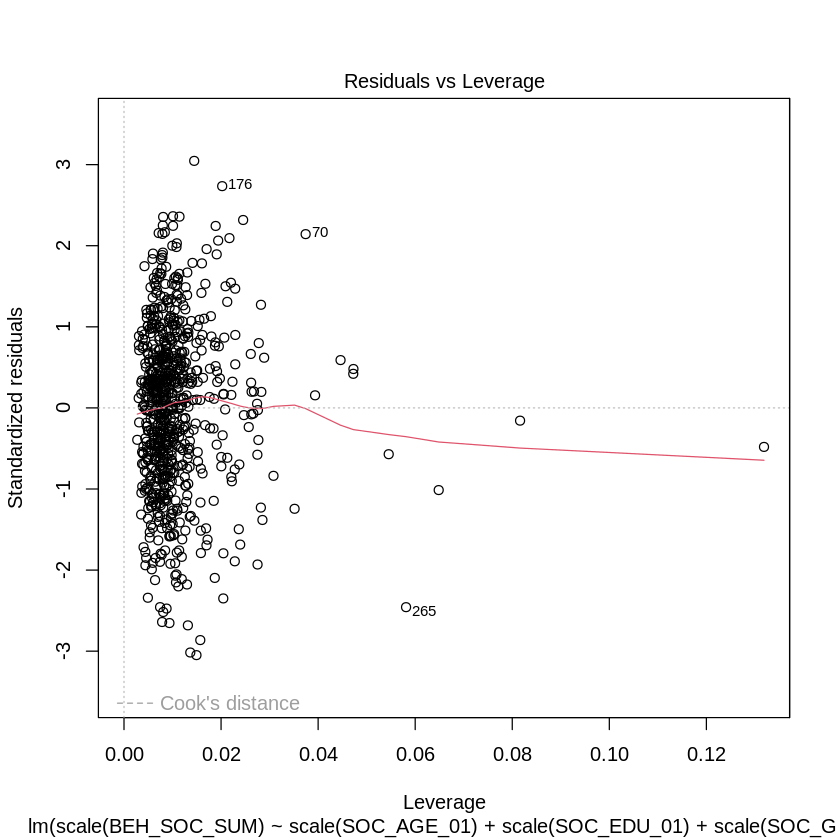

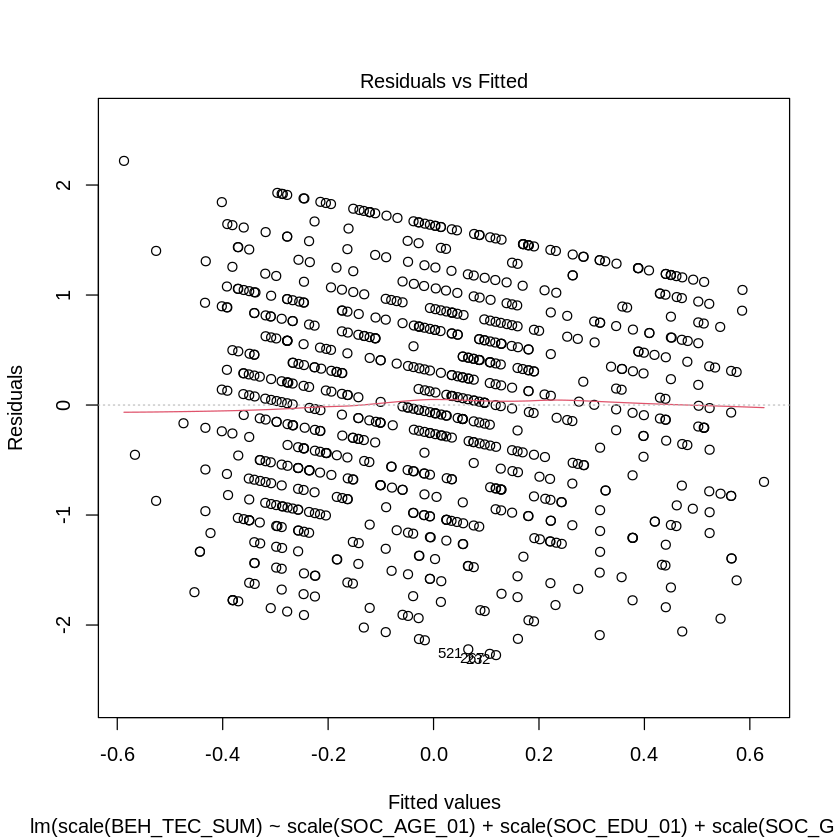

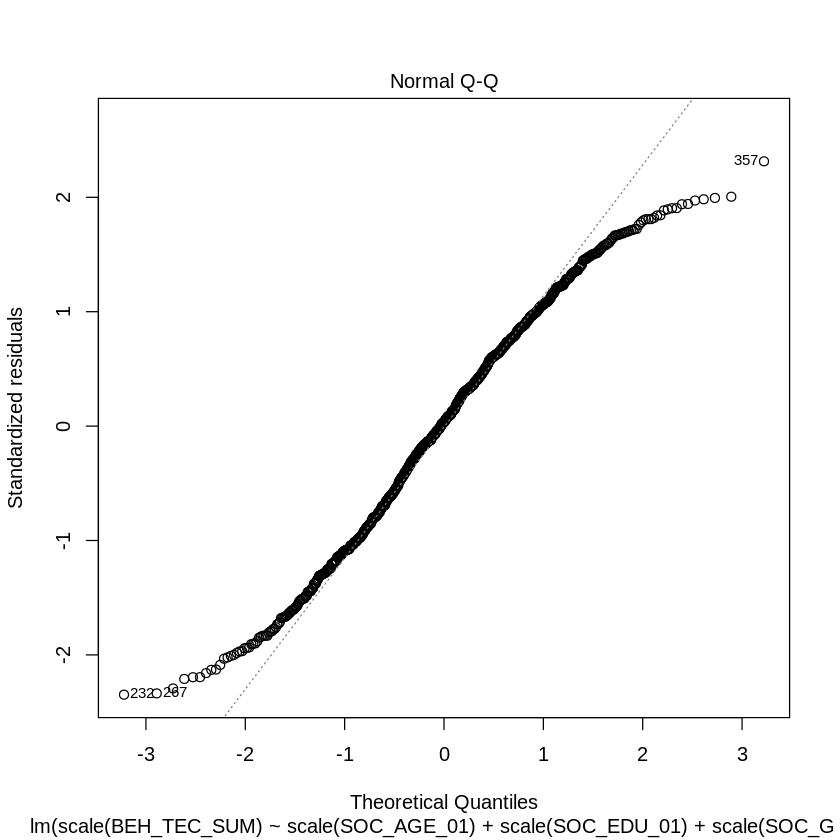

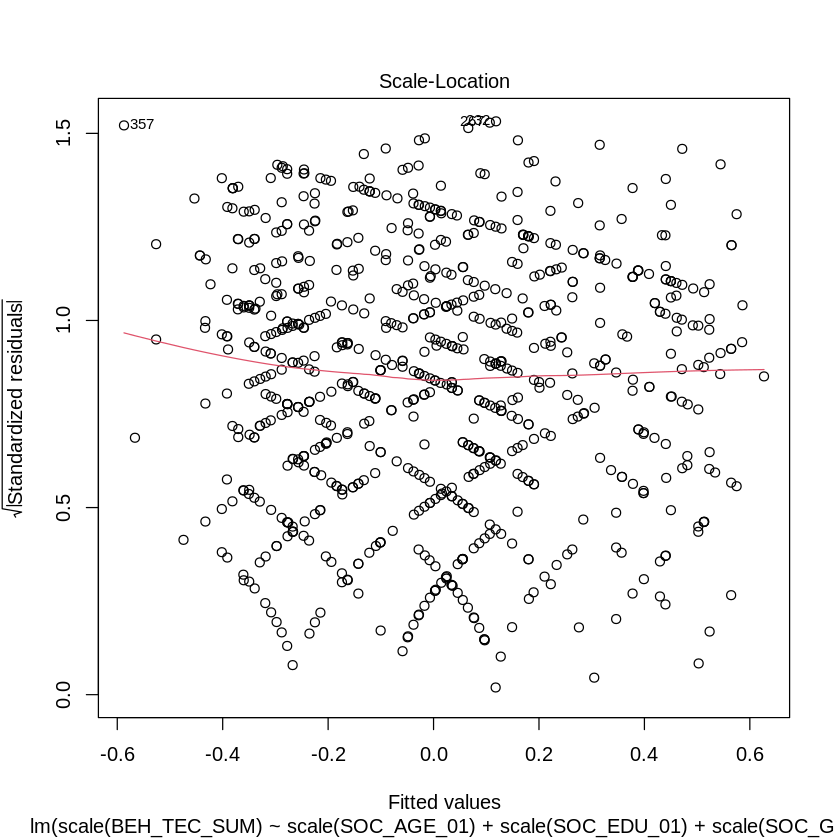

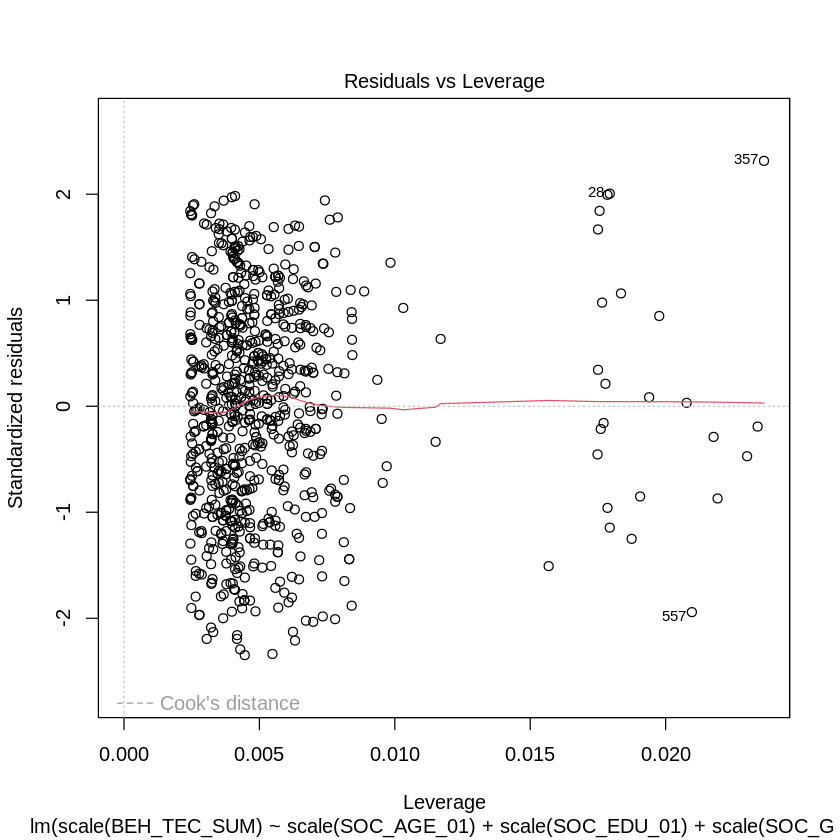

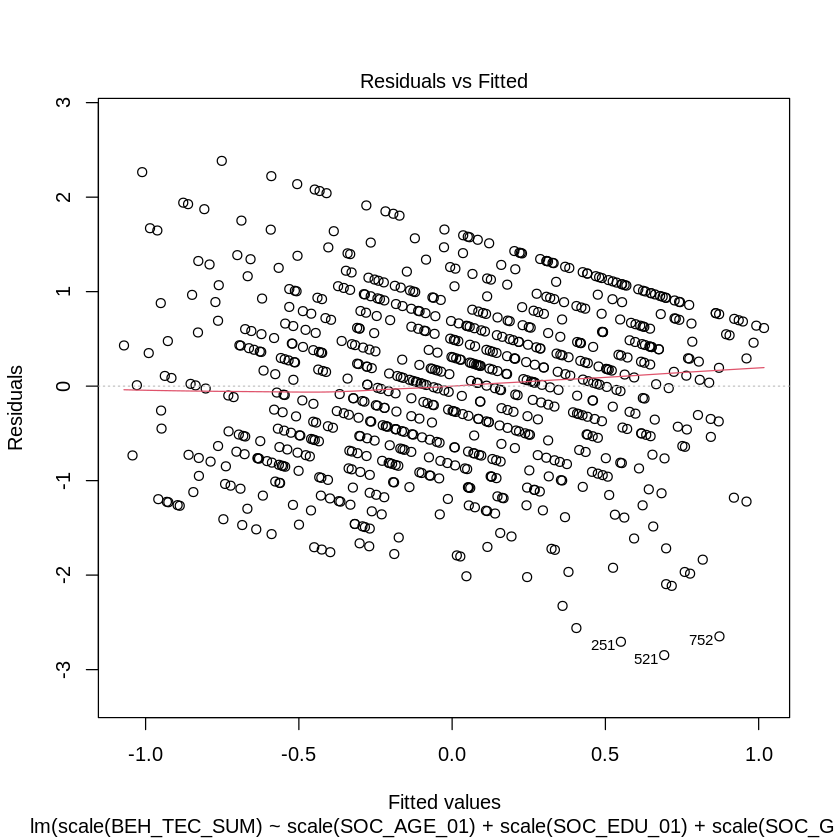

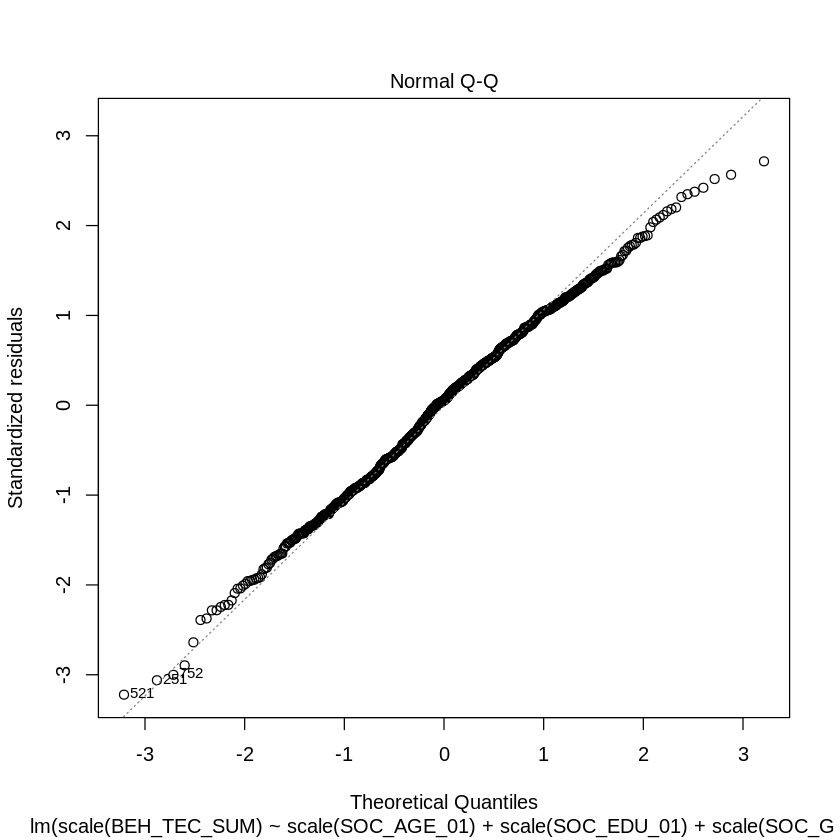

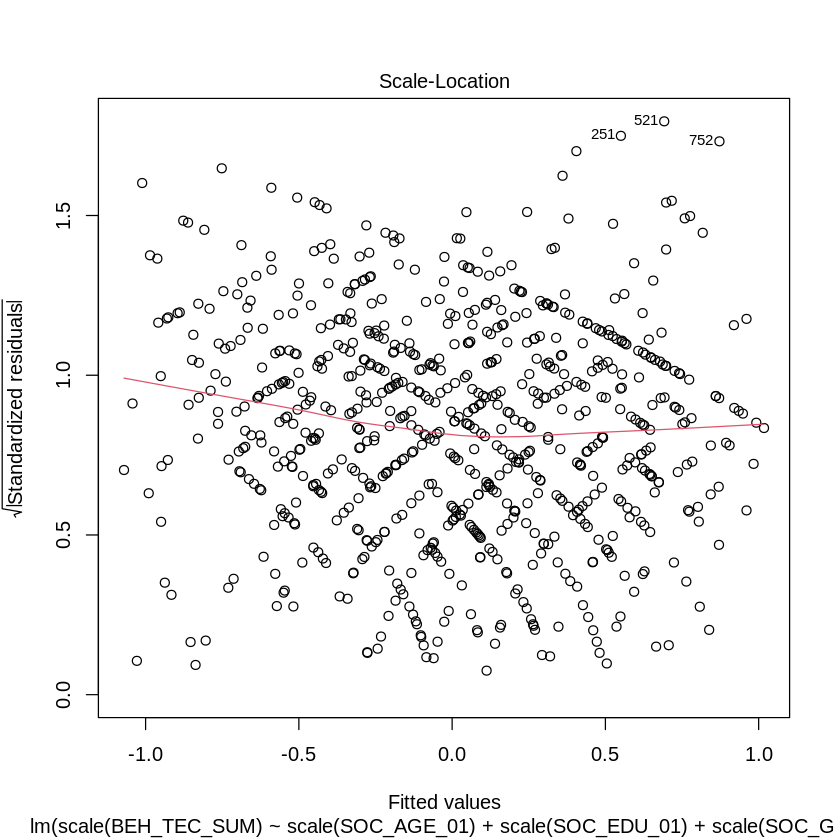

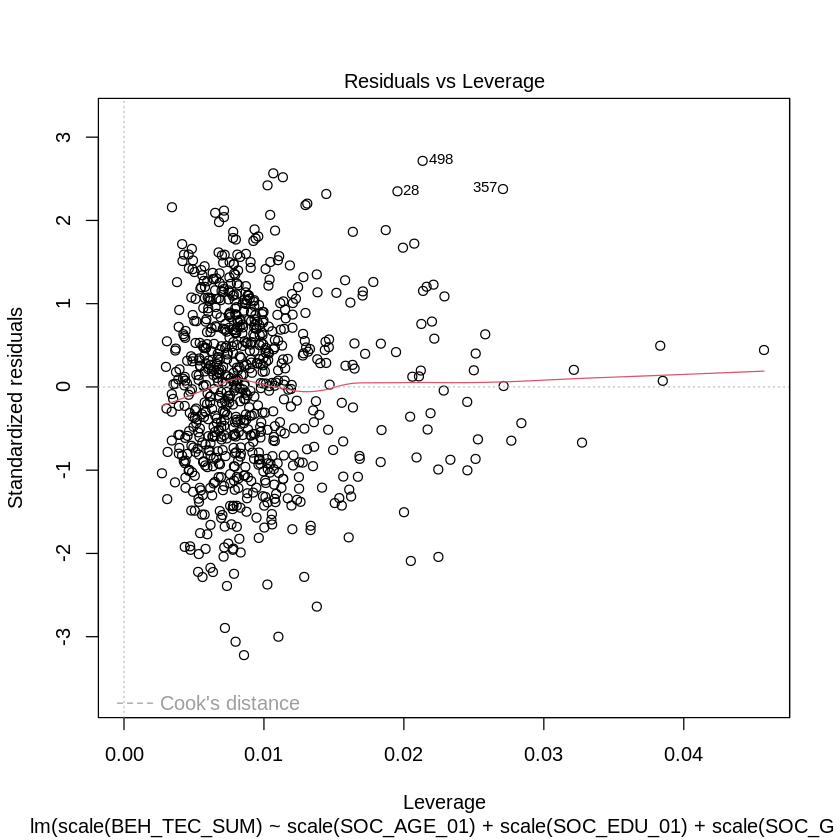

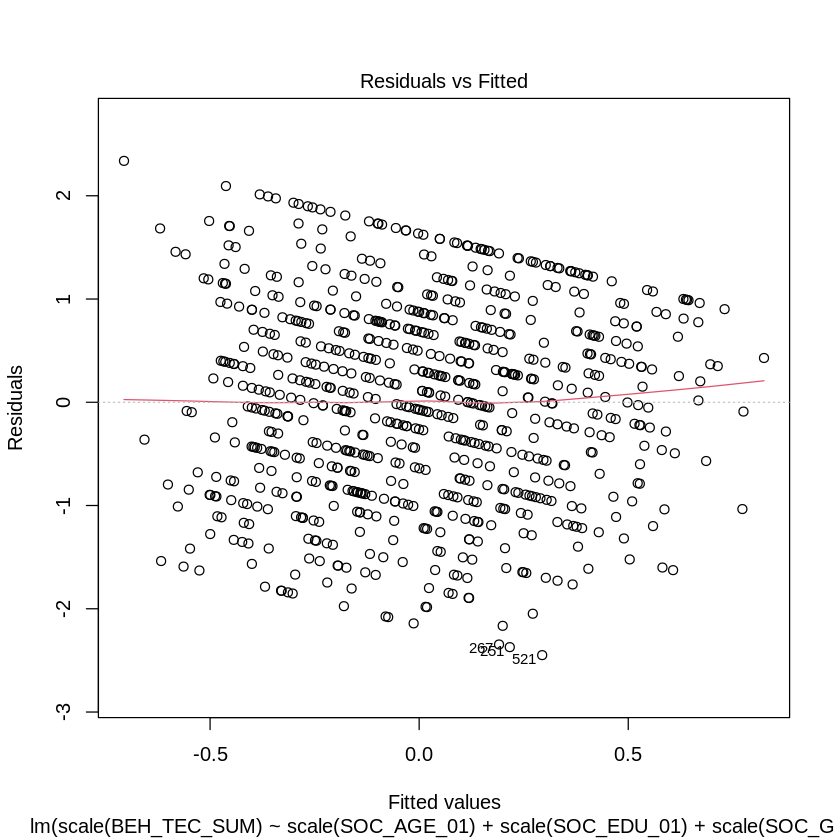

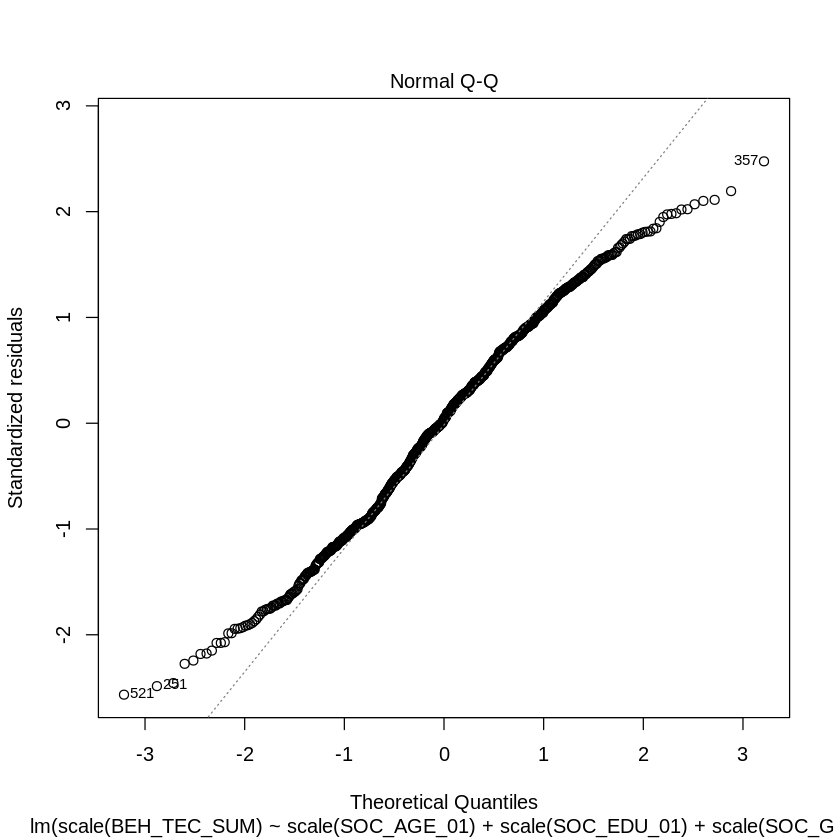

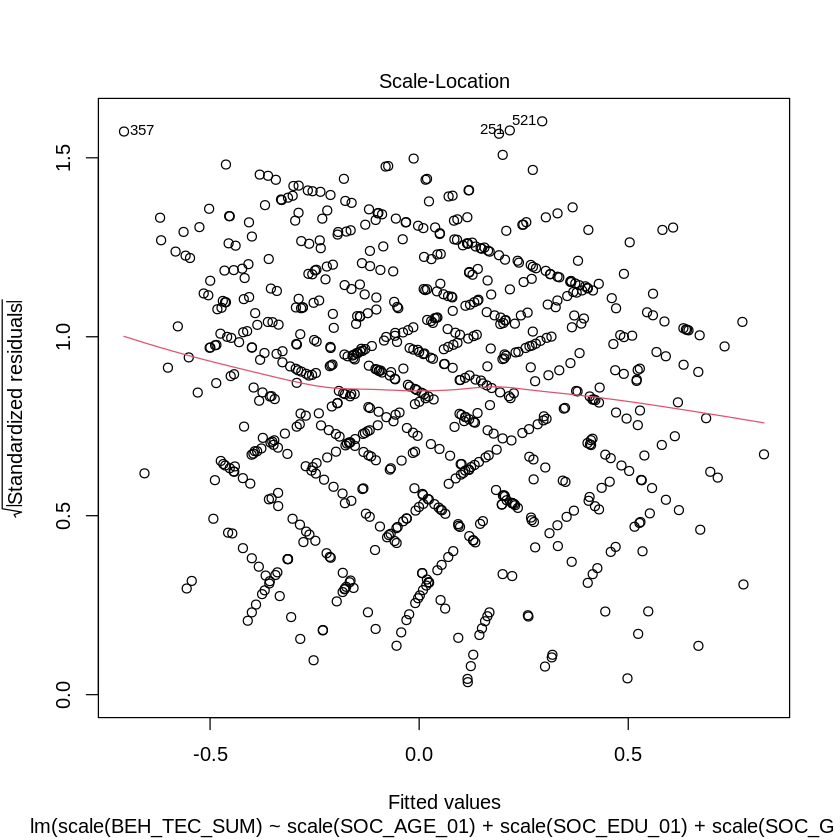

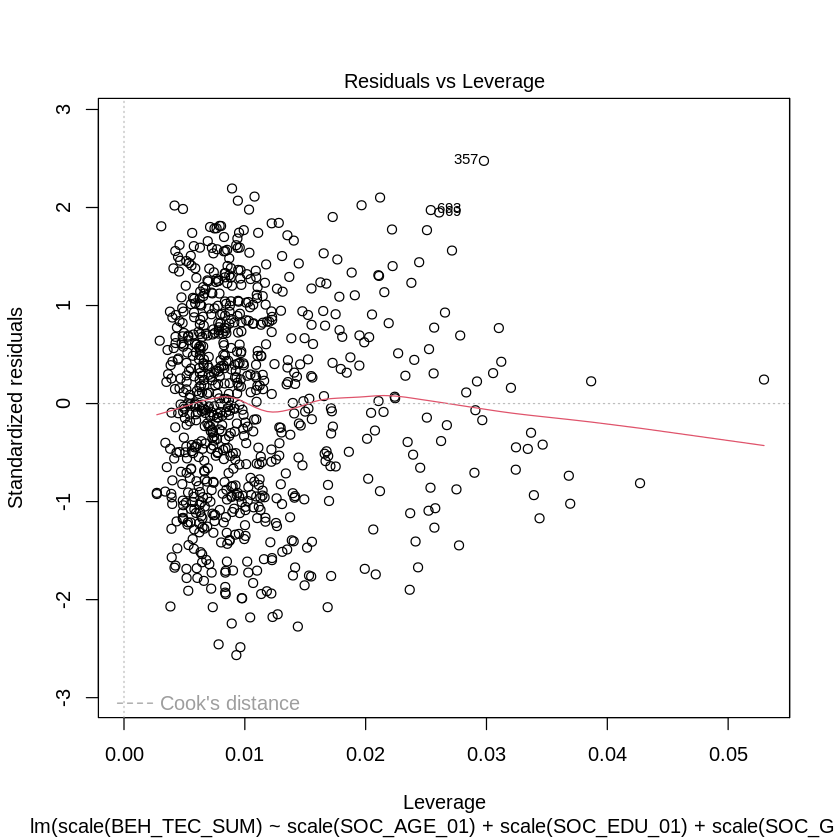

In [ ]:
# Checking the assumption of linearity, normality, homoscedastity & independence of residuals
plot(LM_SOC_POL)
plot(SOC_INT_TEC_D)
plot(LM_TEC_1)
plot(LM_TEC_TEC)
plot(TEC_INT_POL_Y)

In [ ]:
# Creating the models for the CFA
# Only five out of all the models have been choosen due to the large amount of regressions
model1 <- 'LM_SOC_POL_M =~ BEH_SOC_SUM + SOC_AGE_01 + SOC_EDU_01 + SOC_GEN_FIN + INT_EXP_01_FIN + INT_EXP_02_FIN + LIT_POL_SUM'
model2 <- 'SOC_INT_TEC_D_M =~ BEH_SOC_SUM + SOC_AGE_01 + SOC_EDU_01 + SOC_GEN_FIN + INT_EXP_01_FIN + INT_EXP_02_FIN + LIT_TEC_SUM + LIT_TEC_SUM:INT_EXP_01_FIN'
model3 <- 'LM_TEC_1_M =~ BEH_TEC_SUM + SOC_AGE_01 + SOC_EDU_01 + SOC_GEN_FIN'
model4 <- 'LM_TEC_TEC_M =~ BEH_TEC_SUM + SOC_AGE_01 + SOC_EDU_01 + SOC_GEN_FIN + INT_EXP_01_FIN + INT_EXP_02_FIN + LIT_TEC_SUM'
model5 <- 'TEC_INT_POL_Y_M =~ BEH_TEC_SUM + SOC_AGE_01 + SOC_EDU_01 + SOC_GEN_FIN + INT_EXP_01_FIN + INT_EXP_02_FIN + LIT_POL_SUM + LIT_POL_SUM:INT_EXP_02_FIN'

# Fiting the CFA model
fit1 <- cfa(model1, data = df)
fit2 <- cfa(model2, data = df)
fit3 <- cfa(model3, data = df)
fit4 <- cfa(model4, data = df)
fit5 <- cfa(model5, data = df)

# Getting the summary of all the models
summary(fit1)
summary(fit2)
summary(fit3)
summary(fit4)
summary(fit5)


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”
Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”
Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are (at least) a factor 1000 times larger than others; use varTable(fit) to investigate”
Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some observed variances are larger than 1000000
  lavaan NOTE: use varTable(fit) to investigate”
Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
“lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified.”
Warning messag

lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LM_SOC_POL_M,=~,BEH_SOC_SUM,0,1.000000e+00,0.000000e+00,NA,NA
LM_SOC_POL_M,=~,SOC_AGE_01,0,-1.298023e+02,9.167904e+02,-0.1415834,8.874091e-01
LM_SOC_POL_M,=~,SOC_EDU_01,0,-3.533442e-02,9.594755e-03,-3.6826812,2.307937e-04
LM_SOC_POL_M,=~,SOC_GEN_FIN,0,4.465298e-03,6.014400e-03,0.7424346,4.578241e-01
LM_SOC_POL_M,=~,INT_EXP_01_FIN,0,7.154065e+00,2.807590e+00,2.5481158,1.083065e-02
LM_SOC_POL_M,=~,INT_EXP_02_FIN,0,-8.190048e-01,1.520252e-01,-5.3872969,7.152523e-08
LM_SOC_POL_M,=~,LIT_POL_SUM,0,7.389159e-03,1.957857e-02,0.3774106,7.058685e-01
BEH_SOC_SUM,~~,BEH_SOC_SUM,0,8.645861e+01,5.167062e+00,16.7326433,0.000000e+00
SOC_AGE_01,~~,SOC_AGE_01,0,-5.967203e+03,4.418916e+04,-0.1350377,8.925821e-01


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
SOC_INT_TEC_D_M,=~,BEH_SOC_SUM,0,1.000000e+00,0,NA,NA
SOC_INT_TEC_D_M,=~,SOC_AGE_01,0,-2.474991e+00,NA,NA,NA
SOC_INT_TEC_D_M,=~,SOC_EDU_01,0,1.102543e-01,NA,NA,NA
SOC_INT_TEC_D_M,=~,SOC_GEN_FIN,0,-3.711399e-02,NA,NA,NA
SOC_INT_TEC_D_M,=~,INT_EXP_01_FIN,0,3.379161e+02,NA,NA,NA
SOC_INT_TEC_D_M,=~,INT_EXP_02_FIN,0,3.398375e+00,NA,NA,NA
SOC_INT_TEC_D_M,=~,LIT_TEC_SUM,0,8.819326e+00,NA,NA,NA
SOC_INT_TEC_D_M,=~,LIT_TEC_SUM:INT_EXP_01_FIN,0,1.564433e+04,NA,NA,NA
BEH_SOC_SUM,~~,BEH_SOC_SUM,0,8.572840e+01,NA,NA,NA


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LM_TEC_1_M,=~,BEH_TEC_SUM,0,1.000000e+00,0,NA,NA
LM_TEC_1_M,=~,SOC_AGE_01,0,1.443407e+04,NA,NA,NA
LM_TEC_1_M,=~,SOC_EDU_01,0,5.476684e+00,NA,NA,NA
LM_TEC_1_M,=~,SOC_GEN_FIN,0,4.941125e-01,NA,NA,NA
BEH_TEC_SUM,~~,BEH_TEC_SUM,0,2.808971e+01,NA,NA,NA
SOC_AGE_01,~~,SOC_AGE_01,0,-4.971511e+03,NA,NA,NA
SOC_EDU_01,~~,SOC_EDU_01,0,4.669506e-01,NA,NA,NA
SOC_GEN_FIN,~~,SOC_GEN_FIN,0,2.373311e-01,NA,NA,NA
LM_TEC_1_M,~~,LM_TEC_1_M,0,2.538577e-05,NA,NA,NA


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
LM_TEC_TEC_M,=~,BEH_TEC_SUM,0,1.000000e+00,0.000000e+00,NA,NA
LM_TEC_TEC_M,=~,SOC_AGE_01,0,-1.436636e+00,3.034646e-01,-4.7341162,2.200116e-06
LM_TEC_TEC_M,=~,SOC_EDU_01,0,3.746309e-02,1.124006e-02,3.3329970,8.591585e-04
LM_TEC_TEC_M,=~,SOC_GEN_FIN,0,-3.959678e-02,8.301474e-03,-4.7698496,1.843635e-06
LM_TEC_TEC_M,=~,INT_EXP_01_FIN,0,1.375520e+01,3.559076e+00,3.8648241,1.111693e-04
LM_TEC_TEC_M,=~,INT_EXP_02_FIN,0,1.011555e+00,1.557423e-01,6.4950554,8.300294e-11
LM_TEC_TEC_M,=~,LIT_TEC_SUM,0,6.196251e+00,1.225581e+00,5.0557672,4.286639e-07
BEH_TEC_SUM,~~,BEH_TEC_SUM,0,2.322460e+01,1.425553e+00,16.2916493,0.000000e+00
SOC_AGE_01,~~,SOC_AGE_01,0,3.080243e+02,1.588748e+01,19.3878674,0.000000e+00


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TEC_INT_POL_Y_M,=~,BEH_TEC_SUM,0,1.00000000,0.000000e+00,NA,NA
TEC_INT_POL_Y_M,=~,SOC_AGE_01,0,-3.23668253,4.085060e+00,-0.79232186,0.4281730
TEC_INT_POL_Y_M,=~,SOC_EDU_01,0,0.18394558,1.957796e-01,0.93955442,0.3474462
TEC_INT_POL_Y_M,=~,SOC_GEN_FIN,0,0.02768060,8.404517e-02,0.32935390,0.7418882
TEC_INT_POL_Y_M,=~,INT_EXP_01_FIN,0,984.30676877,1.473426e+03,0.66803969,0.5041083
TEC_INT_POL_Y_M,=~,INT_EXP_02_FIN,0,7.06931207,6.337003e+00,1.11556085,0.2646102
TEC_INT_POL_Y_M,=~,LIT_POL_SUM,0,0.10061421,2.775464e-01,0.36251310,0.7169686
TEC_INT_POL_Y_M,=~,LIT_POL_SUM:INT_EXP_02_FIN,0,21.88589365,2.013632e+01,1.08688673,0.2770869
BEH_TEC_SUM,~~,BEH_TEC_SUM,0,27.92620922,1.437511e+00,19.42678008,0.0000000


In [ ]:
# Creating the items per dimension
items_LIT_SUR <- as.matrix(df[, c("S3_LIT_SUR_01_FIN", "S3_LIT_SUR_02_FIN", "S3_LIT_SUR_03_FIN", "S3_LIT_SUR_04_FIN", "S3_LIT_SUR_05_FIN", "S3_LIT_SUR_06_FIN", "S3_LIT_SUR_07_FIN", "S3_LIT_SUR_08_FIN")])
items_LIT_POL <- as.matrix(df[, c("S3_LIT_POL_01_FIN", "S3_LIT_POL_02_FIN", "S3_LIT_POL_03_FIN", "S3_LIT_POL_04_FIN", "S3_LIT_POL_05_FIN", "S3_LIT_POL_06_FIN", "S3_LIT_POL_07_FIN")])
items_LIT_TEC <- as.matrix(df[, c("S3_LIT_TEC_01", "S3_LIT_TEC_02", "S3_LIT_TEC_03", "S3_LIT_TEC_04", "S3_LIT_TEC_05", "S3_LIT_TEC_06", "S3_LIT_TEC_07", "S3_LIT_TEC_08", "S3_LIT_TEC_09")])
items_BEH_TEC <- as.matrix(df[, c("S3_BEH_TEC_1", "S3_BEH_TEC_2", "S3_BEH_TEC_3", "S3_BEH_TEC_4")])
items_BEH_SOC <- as.matrix(df[, c("S3_BEV_SOC_01", "S3_BEV_SOC_02", "S3_BEV_SOC_03", "S3_BEV_SOC_04", "S3_BEV_SOC_05", "S3_BEV_SOC_06", "S3_BEV_SOC_07", "S3_BEV_SOC_08")])

# Getting the standardized alpha
CRO_LIT_SUR <- cronbach.alpha(items_LIT_SUR, standardized = TRUE, na.rm = TRUE)
CRO_LIT_POL <- cronbach.alpha(items_LIT_POL, standardized = TRUE, na.rm = TRUE)
CRO_LIT_TEC <- cronbach.alpha(items_LIT_TEC, standardized = TRUE, na.rm = TRUE)
CRO_BEH_TEC <- cronbach.alpha(items_BEH_TEC, standardized = TRUE, na.rm = TRUE)
CRO_BEH_SOC <- cronbach.alpha(items_BEH_SOC, standardized = TRUE, na.rm = TRUE)

# Results
CRO_LIT_SUR
CRO_LIT_POL
CRO_LIT_TEC
CRO_BEH_TEC
CRO_BEH_SOC


Standardized Cronbach's alpha for the 'items_LIT_SUR' data-set

Items: 8
Sample units: 800
alpha: 0.712



Standardized Cronbach's alpha for the 'items_LIT_POL' data-set

Items: 7
Sample units: 800
alpha: 0.501



Standardized Cronbach's alpha for the 'items_LIT_TEC' data-set

Items: 9
Sample units: 800
alpha: 0.904



Standardized Cronbach's alpha for the 'items_BEH_TEC' data-set

Items: 4
Sample units: 800
alpha: 0.782



Standardized Cronbach's alpha for the 'items_BEH_SOC' data-set

Items: 8
Sample units: 800
alpha: 0.835
